__Lab 01 - Analysis__

Student Names: [insert your full name(s) here]

Group Number: [insert your group number as in Canvas here]

# Setup

Import the all these python libraries:

In [2]:
import numpy as np
import scipy.spatial as spatial
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

print("✔️ OK to continue!")

✔️ OK to continue!


# Load Responses

Use `np.load()` to load your resp files. Make sure to load all 6 responses into 6 seperate lists or numpy arrays.

In [3]:
#Loading data From FPGA-0
data = np.load("../Responses/fpga0_resp0_50k.npz")
fpga0_resp0 = data['response']

data = np.load("../Responses/fpga0_resp1_50k.npz")
fpga0_resp1 = data['response']


data = np.load("../Responses/fpga0_resp2_50k.npz")
fpga0_resp2 = data['response']

#Loading data from FPGA-1

data = np.load("../Responses/fpga1_resp0_50k.npz")
fpga1_resp0 = data['response']

data = np.load("../Responses/fpga1_resp1_50k.npz")
fpga1_resp1 = data['response']


data = np.load("../Responses/fpga1_resp2_50k.npz")
fpga1_resp2 = data['response']


# print(fpga0_resp0)
print("✔️ OK to continue!")
# Now do the same for all other 5 files

✔️ OK to continue!


# Computer: Intra-chip HD

## Intra-chip HD for FPGA0
Compute the intra-chip HD for FPGA 0 and append them to a list.

Use `spatial.distance.pdist()` with `metric="hamming"` to compute the pairwise Hamming Distance (HD). Read more: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

In [4]:
x0=fpga0_resp0
y0=fpga0_resp1
z0=fpga0_resp2

# gets pairwaise HD between x,y,x
#pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")

HD_fpga0=[]
for i in range(len(x0)):
    pairwise_hd_fpga0 = spatial.distance.pdist([list(x0[i]),list(y0[i]),list(z0[i])], metric="hamming")
    HD_fpga0.append(pairwise_hd_fpga0)
    
# Initalising numpy array with HD probabilities
HD_fpga0 = np.array(HD_fpga0)

# Converting HD probabilities into percentages
HD_fpga0 = HD_fpga0*100
print()

## Intra-chip HD for FPGA1
Compute the intra-chip HD for FPGA 1 and append them to another list.

In [5]:
# Example:
x1=fpga1_resp0
y1=fpga1_resp1
z1=fpga1_resp2

# gets pairwaise HD between x,y,z
#pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")

HD_fpga1=[]
for i in range(len(x1)):
    pairwise_hd_fpga1 = spatial.distance.pdist([list(x1[i]),list(y1[i]),list(z1[i])], metric="hamming")
    HD_fpga1.append(pairwise_hd_fpga1)

# Initalising numpy array with HD probabilities
HD_fpga1 = np.array(HD_fpga1)

# Converting HD probabilities into percentages
HD_fpga1 = HD_fpga1*100

# Compute: Inter-chip HD

Compute the inter-chip HD between FPGA0 and FPGA1 and append them to another list.

In [6]:
inter_HD = []

for i in range(len(x0)):
    pairwise_HD_inter = spatial.distance.pdist([list(x0[i]),list(y1[i])], metric="hamming")
    inter_HD.append(pairwise_HD_inter)

# Initalising numpy array with HD probabilities
inter_HD = np.array(inter_HD)

# Converting HD probabilities into percentages
inter_HD = inter_HD*100

In [7]:
print(inter_HD)
print(str(y0[0]),str(x1[0]))

[[12.5 ]
 [ 0.  ]
 [43.75]
 ...
 [ 6.25]
 [12.5 ]
 [ 0.  ]]
0111111111111000 0111111011101000


In [8]:
np.count_nonzero(inter_HD)

19312

# Statistical Results

Prints the following stats values for each list (intra-chip HD for FPGA0, for FPGA1, and inter-chip HD): min, max, average, and standard deviation (StD). NumPy have functions to compute all these.

Also, print the sample size (n) of our collected data (i.e., the length of each list).

In [9]:
# intra-chip HD for FPGA0
print('{:=^50}'.format("Intra-chip Hamming Distance for FPGA0"))
overall_min_HD_fpga0 = np.min(HD_fpga0)
overall_max_HD_fpga0 = np.max(HD_fpga0)

df_HD_fpga0= pd.DataFrame(HD_fpga0)
df_HD_fpga0_desc = df_HD_fpga0.describe().round(3)
df_HD_fpga0_desc.columns = ['XY','XZ','YZ']

overall_avg_HD_fpga0 = (sum(df_HD_fpga0_desc.loc[['mean']].values[0])/3).round(3)

print("Overall Minimum value:", overall_min_HD_fpga0)
print("Overall Maximum value:", overall_max_HD_fpga0)
print("Overall Average value:", overall_avg_HD_fpga0,"\n")
print(df_HD_fpga0_desc.loc[['min','max','mean','std']])

print("\n\n")

# intra-chip HD for FPGA1
print('{:=^50}'.format("Intra-chip Hamming Distance for FPGA1"))
overall_min_HD_fpga1 = np.min(HD_fpga1)
overall_max_HD_fpga1 = np.max(HD_fpga1)

df_HD_fpga1= pd.DataFrame(HD_fpga1)
df_HD_fpga1_desc = df_HD_fpga1.describe().round(3)
df_HD_fpga1_desc.columns = ['XY','XZ','YZ']
overall_avg_HD_fpga1 = (sum(df_HD_fpga1_desc.loc[['mean']].values[0])/3).round(3)

print("Overall Minimum value:", overall_min_HD_fpga1)
print("Overall Maximum value:", overall_max_HD_fpga1)
print("Overall Average value:", overall_avg_HD_fpga1,"\n")
print(df_HD_fpga1_desc.loc[['min','max','mean','std']])

# Inter-chip HD between FPGA0, FPGA1
print('{:=^50}'.format("Inter-chip HD between FPGA0, FPGA1"))
df_inter_HD= pd.DataFrame(inter_HD)
df_inter_HD_desc = df_inter_HD.describe().round(3)
print(df_inter_HD_desc)

======Intra-chip Hamming Distance for FPGA0=======
Overall Minimum value: 0.0
Overall Maximum value: 50.0
Overall Average value: 0.42 

          XY      XZ      YZ
min    0.000   0.000   0.000
max   50.000  50.000  50.000
mean   0.411   0.430   0.418
std    2.330   2.415   2.368



======Intra-chip Hamming Distance for FPGA1=======
Overall Minimum value: 0.0
Overall Maximum value: 56.25
Overall Average value: 0.368 

          XY      XZ      YZ
min    0.000   0.000   0.000
max   56.250  50.000  56.250
mean   0.369   0.394   0.341
std    2.224   2.351   2.172
========Inter-chip HD between FPGA0, FPGA1========
               0
count  50000.000
mean       4.052
std        7.151
min        0.000
25%        0.000
50%        0.000
75%        6.250
max       62.500


# Plots

Plot and save (as PDF) each list (intra-chip HD for FPGA0, for FPGA1, and inter-chip HD) as a vertical bar graph. Make sure to format the plots with adequate size, title, axis labels, ... (see the Tutorial-01-Python).

To generate vertical bar graphs, use `plt.bar()`. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Or use `plt.hist()` with same size bins. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

[0.   6.25 6.25]


AttributeError: 'silent_list' object has no attribute 'patches'

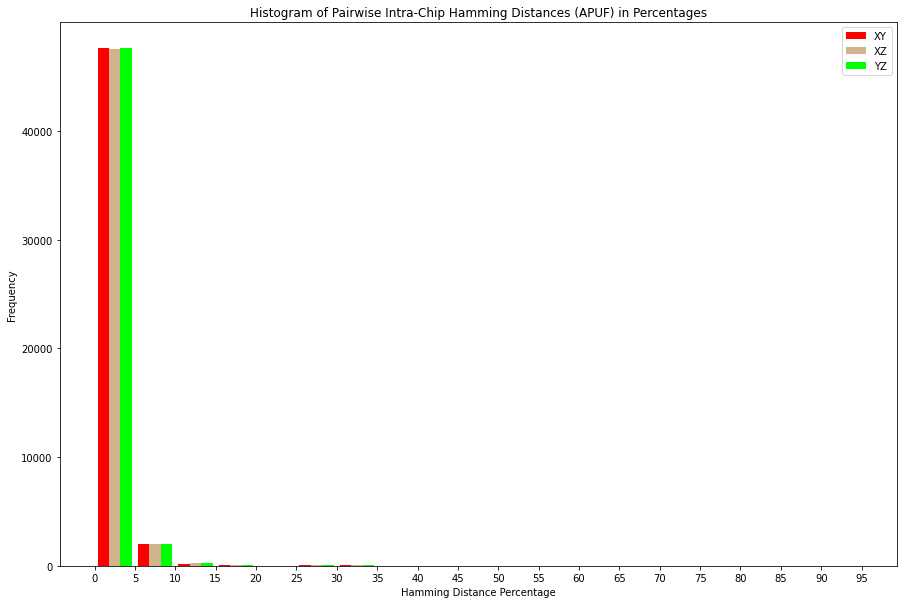

In [10]:
plt.figure(figsize=(15, 10))

print(HD_fpga0[4])

colors = ['red', 'tan', 'lime']
values, bins, bars = plt.hist(HD_fpga0, bins=np.arange(0,100,5), histtype='bar', color=colors, label=["XY","XZ","YZ"],rwidth=0.85)
plt.legend(prop={'size': 10})
plt.xlabel('Hamming Distance Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Pairwise Intra-Chip Hamming Distances (APUF) in Percentages')

plt.xticks(np.arange(0, 100, 5))
plt.bar_label(bars)
plt.margins(x=0.01, y=0.1)
plt.show()
plt.show()

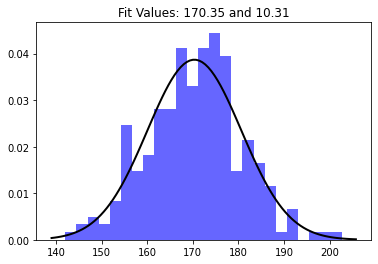

In [11]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
  
# Generate some data for this 
# demonstration.
data = np.random.normal(170, 10, 250)
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

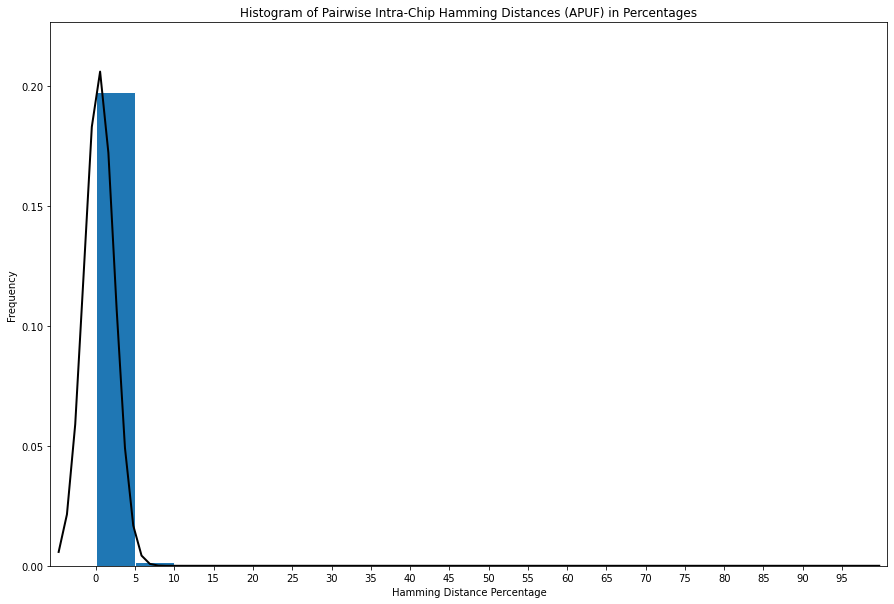

In [12]:

HD_fpga0_avg = np.mean(HD_fpga0, axis=1)

mean, std = norm.fit(HD_fpga0_avg) 

# Create a histogram of pairwise distances as percentages
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(HD_fpga0_avg, bins=np.arange(0,100,5), density=True, edgecolor='white')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Hamming Distance Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Pairwise Intra-Chip Hamming Distances (APUF) in Percentages')

plt.xticks(np.arange(0, 100, 5))
# plt.bar_label(bars)
plt.margins(x=0.01, y=0.1)
plt.show()




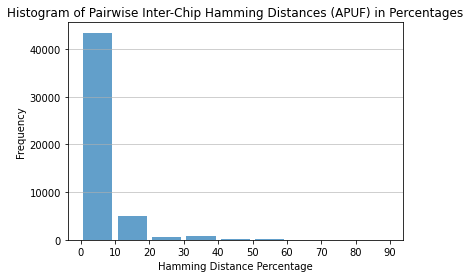

In [13]:


import numpy as np
import matplotlib.pyplot as plt

HD_fpga0_avg = np.mean(HD_fpga0, axis=1)

# Create a histogram of pairwise distances as percentages
plt.hist(inter_HD, bins=np.arange(0,100,10), alpha=0.7, rwidth=0.85)
plt.xlabel('Hamming Distance Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Pairwise Inter-Chip Hamming Distances (APUF) in Percentages')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0, 100, 10))
plt.show()


